# SciPy

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

Library documentation: <a>http://www.scipy.org/scipylib/index.html</a>

In [1]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [2]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [3]:
# integration
val, abserr = quad(lambda x: exp(-x ** 1),  0, Inf)
val, abserr

(1.0000000000000002, 5.842606742906004e-11)

In [4]:
from scipy.integrate import odeint, ode
import numpy as np

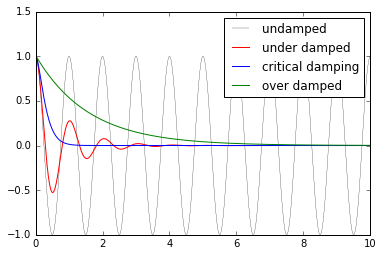

In [5]:
# differential equation
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

# initial state
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*pi*1.0

# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

In [6]:
from scipy.fftpack import *

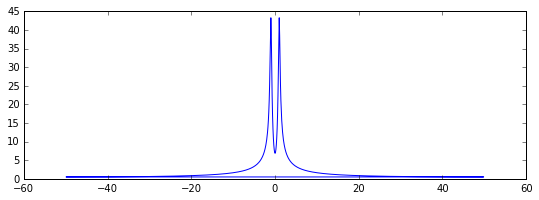

In [7]:
# fourier transform
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Linear Algebra

In [10]:
A = array([[1,2,3], [41,51,61], [7,8,9]])
b = array([1,2,3])

In [11]:
# solve a system of linear equations
x = solve(A, b)
x

array([  1.99756435e+15,  -3.99512870e+15,   1.99756435e+15])

In [12]:
# eigenvalues and eigenvectors
import numpy as np
import scipy as sp
A = np.random.rand(3,3)
B = np.random.rand(3,3)

print(A)

evals, evecs = sp.linalg.eig(A)

evals

[[ 0.62041234  0.50736939  0.66483292]
 [ 0.20216738  0.32180512  0.93958064]
 [ 0.82324555  0.6799078   0.60403023]]


array([ 1.82250800+0.j,  0.05038007+0.j, -0.32664038+0.j])

In [13]:
evecs


array([[-0.57106747, -0.5908263 ,  0.04992697],
       [-0.48951554,  0.80006818, -0.82698827],
       [-0.6589814 , -0.10399612,  0.55999794]])

In [14]:
svd(A)

(array([[-0.56977792,  0.12039619, -0.81293166],
        [-0.49762851, -0.83777805,  0.22470825],
        [-0.65400229,  0.53257177,  0.53726001]]),
 array([ 1.82351162,  0.53880786,  0.030525  ]),
 array([[-0.54428278, -0.49020172, -0.68077788],
        [ 0.63800336,  0.28504367, -0.71533337],
        [-0.54470907,  0.82368221, -0.15760598]]))

### Optimization

In [15]:
from scipy import optimize

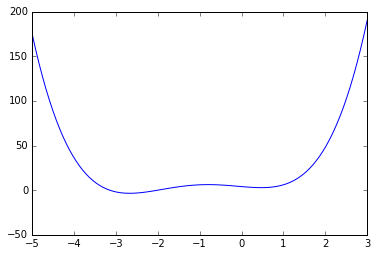

In [16]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [17]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([ 0.46961743])

### Statistics

In [18]:
from scipy import stats

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

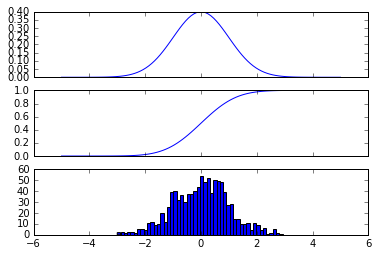

In [19]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

x = linspace(-5,5,100)
print(x)

fig, axes = subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [20]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [21]:
# t-test example
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(-0.96280457585587809, 0.33576211201841566)